Joseph Hickey  
ASTR400B Homework 3  
2/5/2020  
Create a function which returns the total mass of a component of a galaxy

In [121]:
import numpy as np
import astropy.units as u
from ReadFile import Read
import matplotlib.pyplot as plt

In [122]:
def ComponentsMass(file,particletype):
    #file takes the name of the file containing the mass data fo a given galaxy
    #particletype takes 1:Halo, 2:Disk, or 2:Bulge particles from the file
    
#Call the Read function passing it the file of interest
    time, N, data = Read(file)
#Get the array positions for all particles of a given type
    index = np.where(data['type'] == particletype)
#Get Masses of particles
    m = data['m'][index]
#Sum the new masses list to find total mass of given particle type
    Mass = np.around(sum(m),4) * (10**10 * u.Msun)
    Mass = Mass.to(10**12 * u.Msun)
    
    return Mass

In [123]:
#Initialize lists to hold data
#indicies ar 0:Halo, 1:Disk, 2:Bulge, 3:Total, 4:Fraction
MW = [0,0,0,0,0]
M31 = [0,0,0,0,0]
M33 = [0,0,0,0,0]
LG = [0,0,0,0,0]

#Loop over each particle type for each galaxy assigning it to the correct index
for i in range(1,4):
    #Strip the units off since they are in the column headers
    MW[i-1] = ComponentsMass('MW_000.txt',i).value
    M31[i-1] = ComponentsMass('M31_000.txt',i).value
    M33[i-1] = ComponentsMass('M33_000.txt',i).value
    



In [124]:
# MUST RUN >>>AFTER<<< PREVIOUS CELL
MW[3] = MW[0] + MW[1] + MW[2] # Milky Way Mass
M31[3] = M31[0] + M31[1] + M31[2] # M31 Mass
M33[3] = M33[0] + M33[1] + M33[2] # M33 Mass
MW[4] = np.around((MW[1] + MW[2]) / MW[3],4) # Milky Way Baryon fraction
M31[4] = np.around((M31[1] + M31[2]) / M31[3],4) # M31 Baryon fraction
M33[4] = np.around((M33[1] + M33[2]) / M33[3],4) # M33 Baryon fraction
LG[3] = MW[3] + M31[3] + M33[3] # Local Group Total Mass
# Local Group Baryon fraction
LG[4] = np.around((MW[1] + MW[2] + M31[1] + M31[2] + M33[1] + M33[2]) / (LG[3]),4)

#Add in row titles
MW.insert(0,'Milky Way') 
M31.insert(0,'M31')
M33.insert(0,'M33')
LG.insert(0,"Local Group")

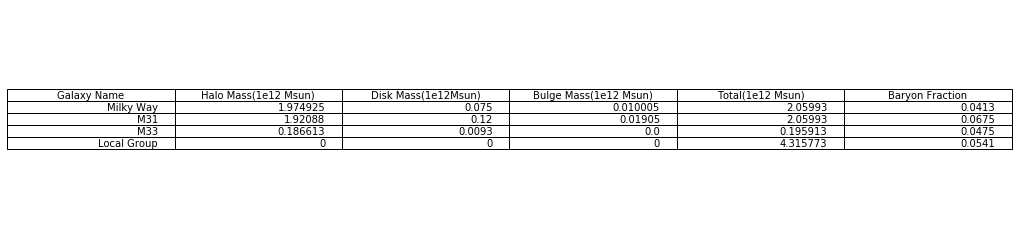

In [127]:
#Create plot for table since I didn't want to open LaTek at 10:30pm Wednesday night
fig, ax = plt.subplots(1,1)
#Populate cells of table
cells = [MW,M31,M33,LG]
#Name the columns
columns = ['Galaxy Name','Halo Mass(1e12 Msun)','Disk Mass(1e12Msun)','Bulge Mass(1e12 Msun)','Total(1e12 Msun)','Baryon Fraction']
#Remove unsightly axes
ax.axis('off')
#Plot the table, really should have used pandas dataframes but procrastinated, that's on me.
ax.table = plt.table(cellText=cells,colWidths=[0.5,0.5,0.5,0.5,0.5,0.5],colLabels=columns,loc='center')
